In [1]:
%matplotlib inline

from core import *
import pickle

samples = analysis_set["main"]

kmer_profiles = pickle.load(open("pickles/kmer_profiles_20_100_200k.pckl", "rb" ) )

kmer_acc_sorted = {}
for sample in samples:
    kmer_acc = {}
    print(sample)
    for ref_kmer in kmer_profiles[sample].keys():
        n = sum(kmer_profiles[sample][ref_kmer].values())
        if n > 100:
            count = kmer_profiles[sample][ref_kmer][ref_kmer]
            ratio = count / n
            kmer_acc[ref_kmer] = ratio
    kmer_acc_sorted[sample] = np.array(sorted(list(kmer_acc.items()), key=lambda x: x[1], reverse=True))
    for i in range(10):
        kmer, acc = kmer_acc_sorted[sample][i]
        kmer2, acc2 = kmer_acc_sorted[sample][-10 + i]
        print(kmer, np.round(np.float64(acc), 5), kmer2, np.round(np.float64(acc2), 5))

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Human
AGU 0.99596 CAC 0.91489
AAA 0.99391 UAA 0.91478
UGC 0.99076 UGG 0.90376
CCC 0.99049 UCG 0.89896
AAU 0.9903 GUU 0.89466
AGC 0.99015 AUU 0.88992
AAG 0.98904 ACC 0.88818
UGA 0.98797 CUU 0.86388
GAU 0.98791 CGG 0.8383
AGA 0.98751 UCU 0.80721
Human_IVT
AGU 0.99647 CUC 0.93466
AGC 0.99593 GUU 0.93277
AAA 0.99493 UUU 0.93073
AGA 0.99453 AUU 0.92931
UGC 0.99231 UCG 0.9261
GAU 0.99153 UAG 0.92433
UGU 0.99128 UUC 0.90642
GAC 0.98922 CGG 0.89357
CCC 0.98893 CUU 0.89159
GGG 0.98881 UCU 0.82122
Mouse
AGU 0.99367 AUU 0.89952
CCC 0.9926 CUA 0.89662
AGC 0.99255 UAC 0.88954
AGA 0.99182 CAC 0.88884
AAA 0.99165 CUC 0.88685
UGC 0.98526 UUC 0.87579
GAU 0.98394 UCG 0.87481
GGG 0.98279 CUU 0.84728
UGU 0.98218 CGG 0.81013
GUG 0.97615 UCU 0.78358
Zebrafish
AGC 0.9947 ACU 0.88057
AGA 0.99344 UUU 0.87395
GAU 0.99304 UUC 0.86299
AAU 0.99159 AUU 0.84931
AGU 0.99158 GUU 0.84834
UGA 0.99122 ACC 0.83884
GAC 0.99092 UCG 0.8371
UGU 0.99025 CUC 0.82362
AAA 0.98953 CUU 0.72067
GGC 0.98762 UCU 0.69749
C. elegans
AAA

A
216 216
C
216 216
G
216 216
U
216 216


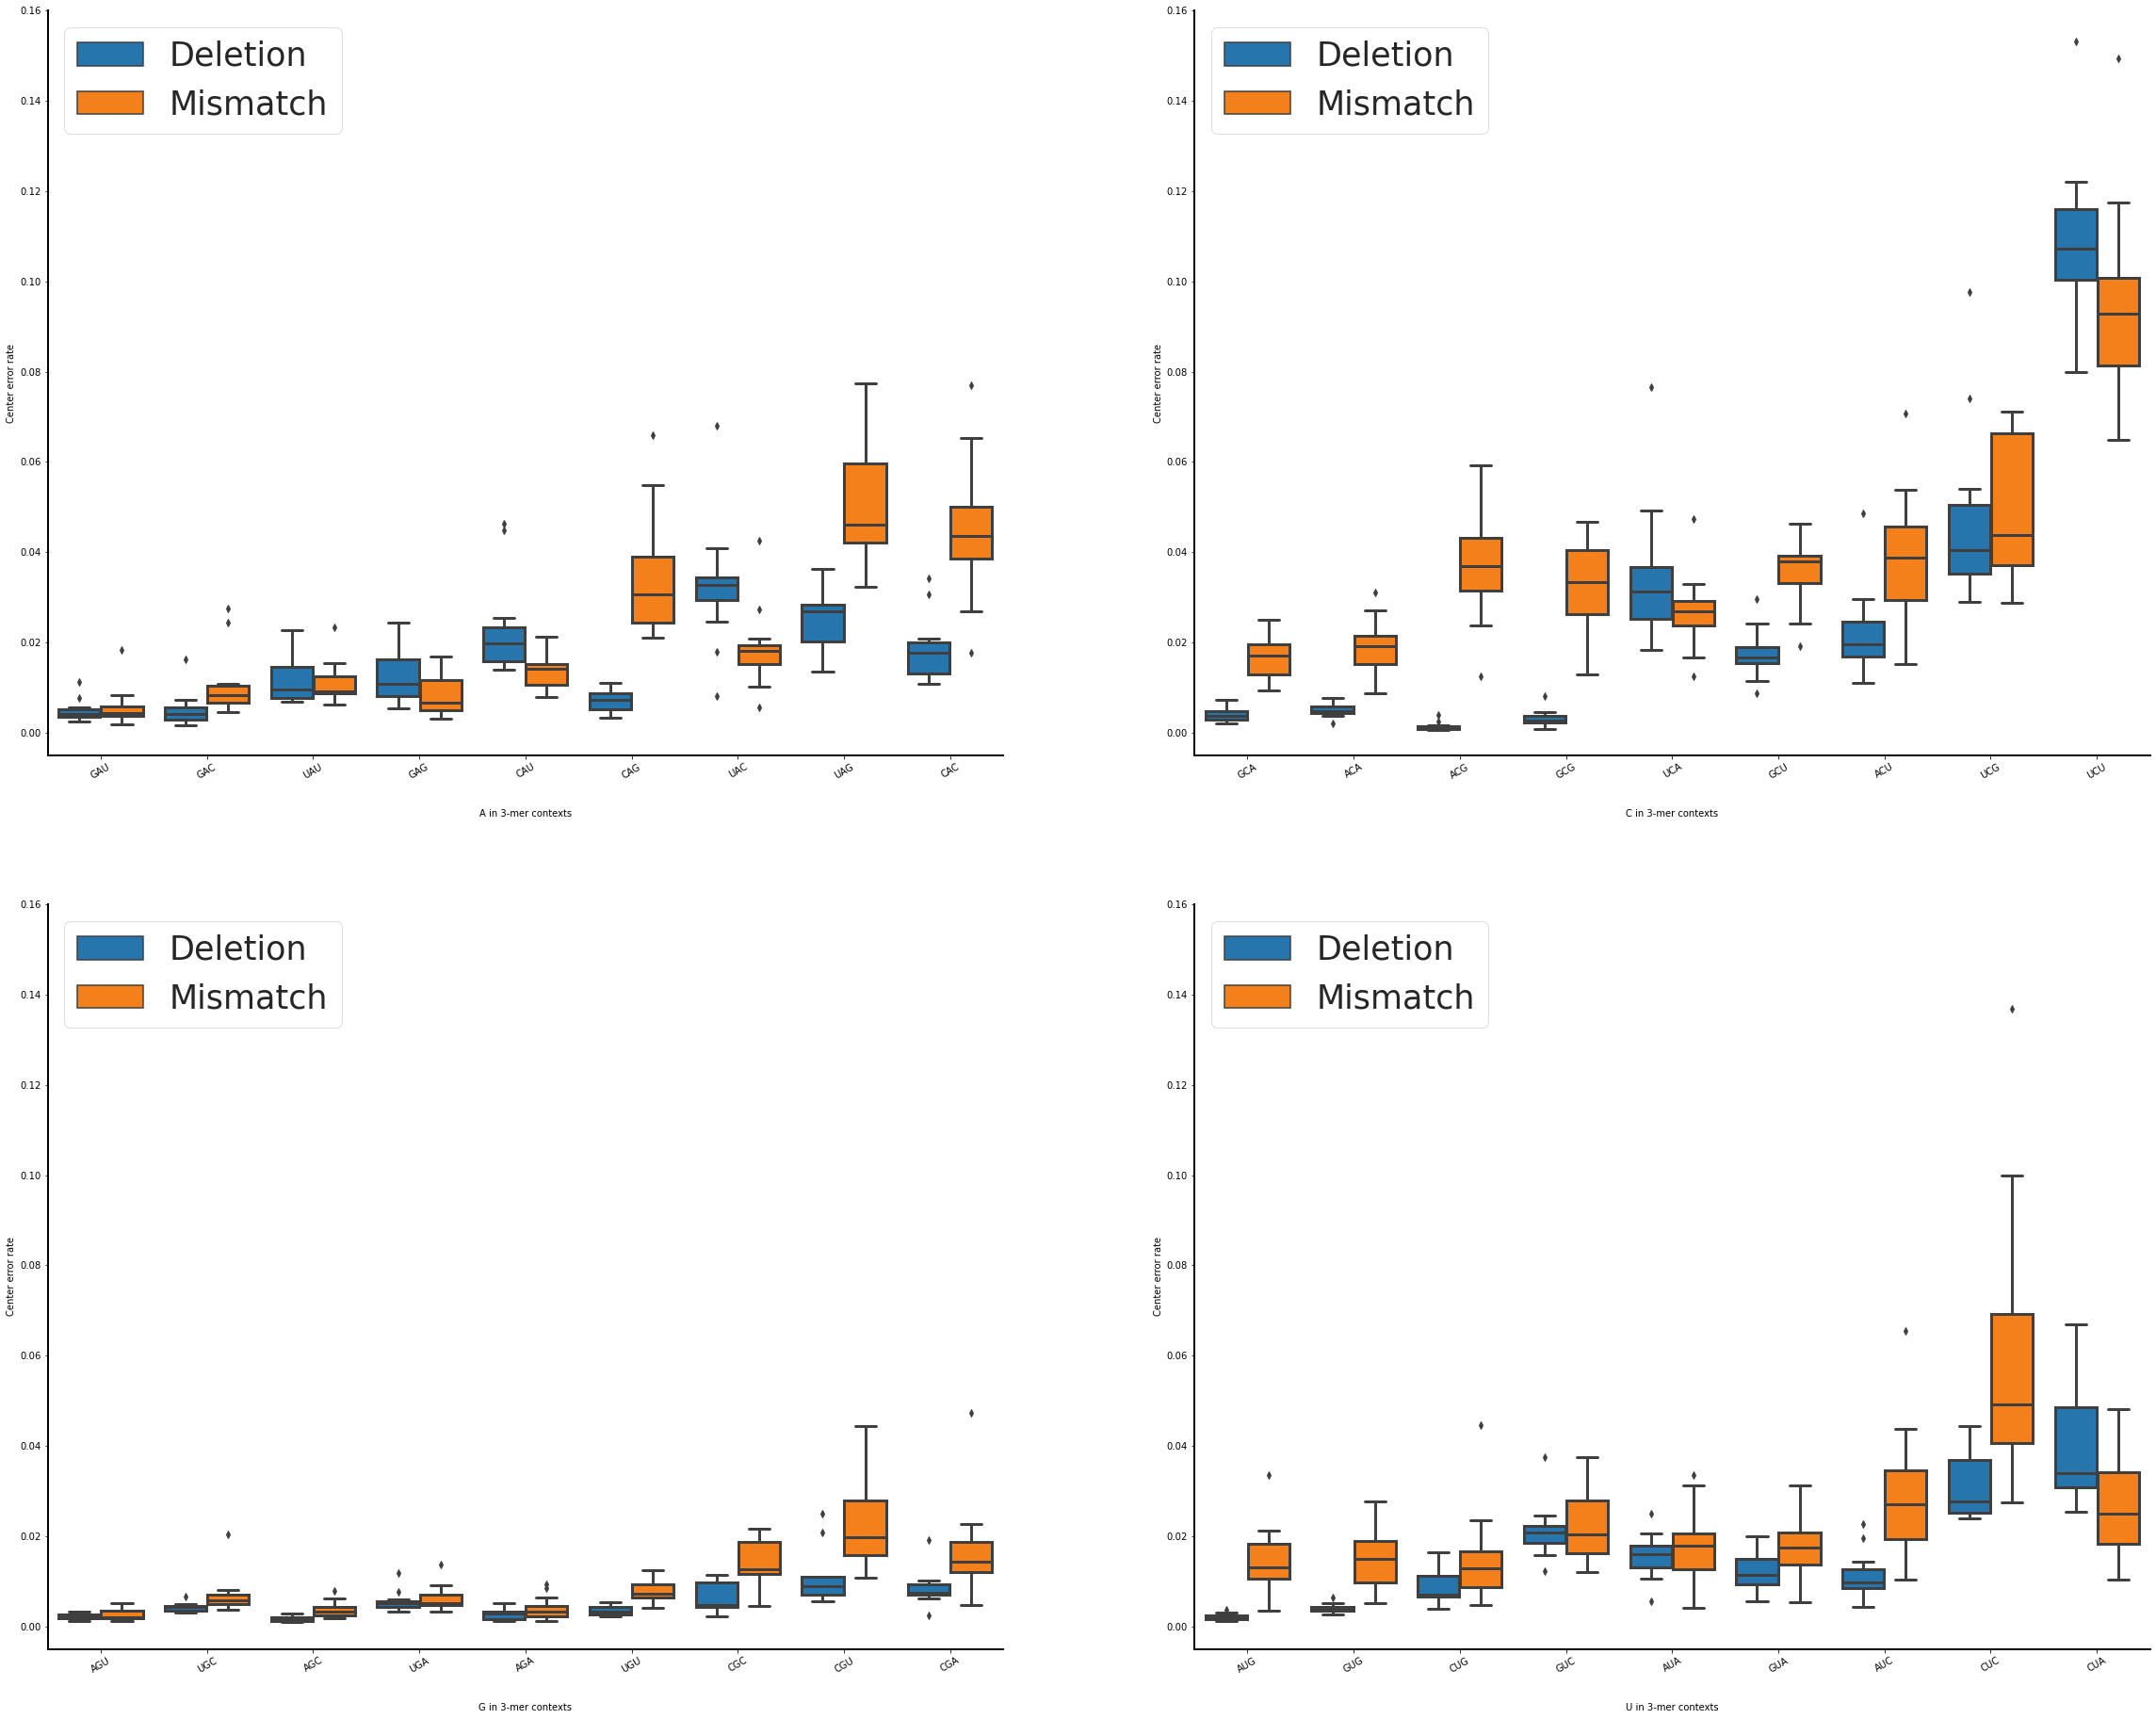

In [2]:
fig, axes = plt.subplots(2, 2, figsize = (40, 32))

alphabet = ["A", "C", "G", "U"]
row, col = 0, 0
sns.set_context("paper", font_scale = 4.5)
sns.set_style("ticks")
for letter in alphabet:
    print(letter)
    x, y, hue = [], [], []

    for sample in kmer_acc_sorted.keys():
        for motif, acc in kmer_acc_sorted[sample]:
            if motif[1] == letter and len(set(motif)) > 1 and motif[1] != motif[0] and motif[1] != motif[2]:
                total = sum(kmer_profiles[sample][motif].values())
                
                del_motif = motif[0] + '_' + motif[2]
                if del_motif in kmer_profiles[sample][motif]: 
                    del_total = kmer_profiles[sample][motif][del_motif]
                    x.append(motif)
                    y.append(del_total / total)
                    hue.append("Deletion")
                else:
                    del_total = 0

                mis_total = total - del_total - kmer_profiles[sample][motif][motif]
                x.append(motif)
                y.append(mis_total / total)
                hue.append("Mismatch")
                
    print(len(x), len(y))

    
    sns.boxplot(x = x, y = y, hue = hue, ax = axes[row, col], linewidth=3, saturation=0.9)# color="silver", fliersize = 3)
    sns.despine()
    axes[row, col].legend(fontsize = 35, loc = "upper left")
    axes[row, col].set(xlabel=letter + " in 3-mer contexts", ylabel="Center error rate")
    axes[row, col].xaxis.labelpad = 30
    axes[row, col].xaxis.fontsize = 40
    axes[row, col].tick_params(axis = 'x', rotation = 30)
    axes[row, col].set_ylim(-0.005, 0.16)
    axes[row, col].spines['left'].set_linewidth(2), axes[row, col].spines['bottom'].set_linewidth(2)

    col += 1
    if col == 2:
        row += 1
        col = 0
# plt.savefig("images/contexts", bbox_inches = "tight")
plt.show()